<h3> LAB 7 - Transformada Z</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

1) crie uma função H=respfreq(b,a,w) que retorne H, o vetor complexo que contem a resposta em frequência do sistema para cada valor de frequência do vetor w.

In [2]:
def respfreq(b,a,w):
    B = np.zeros(len(b), dtype=np.complex)
    A = np.zeros(len(a), dtype=np.complex)
    H = np.zeros(len(w), dtype=np.complex)
    for i in range (len(w)):
        for k in range (len(b)):
            B[k] = b[k]*np.exp(-1j*k*w[i])
        for k in range (len(a)):
            A[k] = a[k]*np.exp(-1j*k*w[i]);
        H[i]= sum(B)/sum(A);
    return H

2) plote no mesmo grafico a resposta em frequencia do sistema b=[1 0 0.3], a=[1 -0.5], usando respfreq() e freqz().

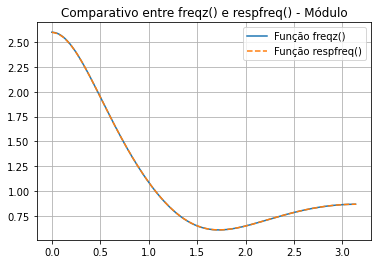

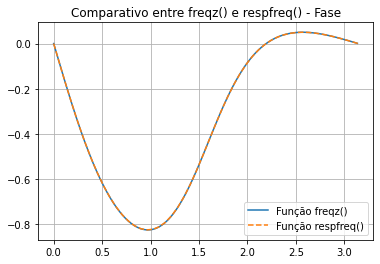

In [3]:
b=[1, 0, 0.3]
a=[1 , -0.5]

w_freqz,H_freqz = signal.freqz(b,a)
w_resp = np.linspace(0,np.pi,50)

H_resp = respfreq(b,a,w_resp)

plt.grid(True)
plt.plot(w_freqz, abs(H_freqz) ,w_resp, abs(H_resp), '--')
plt.legend(['Função freqz()','Função respfreq()'])
plt.title("Comparativo entre freqz() e respfreq() - Módulo")
plt.show()

plt.grid(True)
plt.plot(w_freqz, np.angle(H_freqz),w_resp, np.angle(H_resp), "--")
plt.legend(['Função freqz()','Função respfreq()'])
plt.title("Comparativo entre freqz() e respfreq() - Fase")
plt.show()

3) usando a função zplane() responda quais são os valores dos pólos e zeros deste sistema.

Como o Python não possui uma função equivalente ao zplane() do MATLAB, 
optou-se por utilizar uma função já existente disponível no site:
https://www.dsprelated.com/showcode/244.php

In [4]:
#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=8.0, markeredgewidth=1.0,
              markeredgecolor='r', markerfacecolor='none')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=8.0, markeredgewidth=1.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    
    print("Zeros:" , z)
    print("Polos: ", p)
    
    return 

Com  a função criada, ela foi utilizada com b=[1 0 0.3] e a=[1 -0.5]

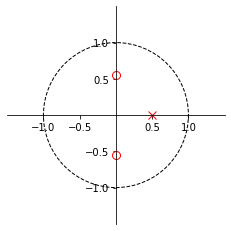

Zeros: [-0.+0.54772256j  0.-0.54772256j]
Polos:  [0.5]


In [5]:
zplane(b,a)